In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

**Variables or features explanations:**

age (Age in years)

sex : (1 = male, 0 = female)

cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]

trestbps (Resting Blood Pressure in mm/hg )

chol (Serum Cholesterol in mg/dl)

fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]

restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]

thalach (maximum heart rate achieved)

exang (Exercise Induced Angina): [1 = yes, 0 = no]

oldpeak (ST depression induced by exercise relative to rest)

slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]

ca [number of major vessels (0–3)

thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]

target: [0 = disease, 1 = no disease]

In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**a) Check the data type.**

The variables types are

Binary: sex, fbs, exang, target

Categorical: cp, restecg, slope, ca, thal

Continuous: age, trestbps, chol, thalac, oldpeak

**nunique()** 

This function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index. 

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**b. Check for the data characters mistakes**

1. feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.

2. Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.


In [ ]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
#to count the number in of each category decending order
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [ ]:
#to find the row for '4'
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
df.loc[df['ca']==4,'ca']= np.NaN  

In [ ]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
df['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [ ]:
df.loc[df['thal']==0,'thal']= np.NaN  

In [ ]:
df['thal'].unique()

array([ 1.,  2.,  3., nan])

In [ ]:
#to check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [ ]:
df = df.fillna(df.median())

In [ ]:
new_df=df.copy()

In [ ]:
new_df['target'] = new_df.target.replace({1: "Disease", 0: "No_disease"})
new_df['sex'] = new_df.sex.replace({1: "Male", 0: "Female"})
new_df['cp'] = new_df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
new_df['exang'] = new_df.exang.replace({1: "Yes", 0: "No"})
new_df['fbs'] = new_df.fbs.replace({1: "True", 0: "False"})
new_df['slope'] = new_df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
new_df['thal'] = new_df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

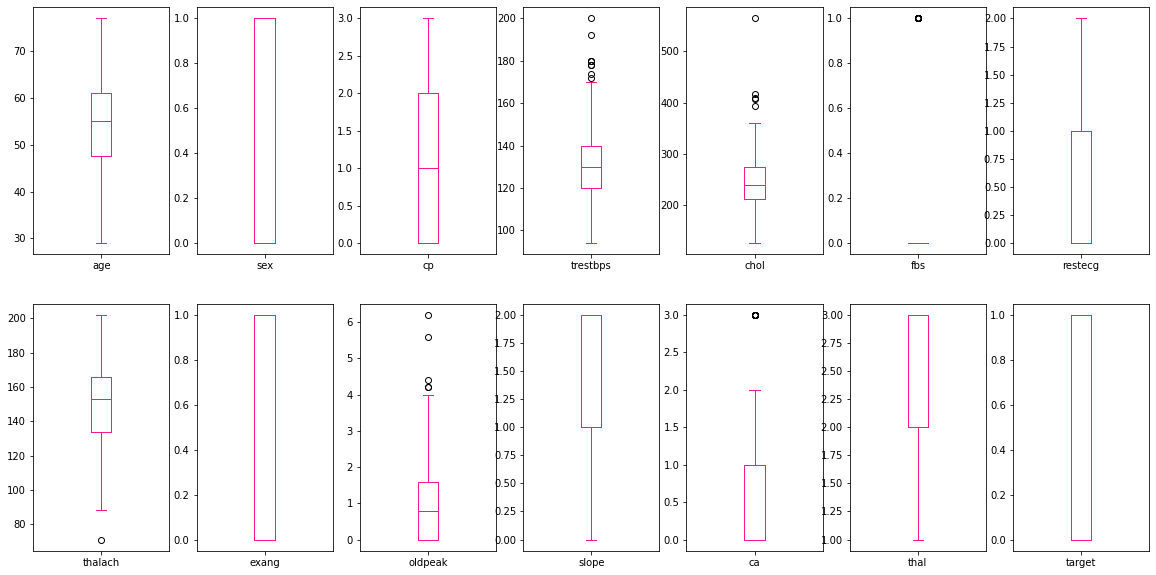

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


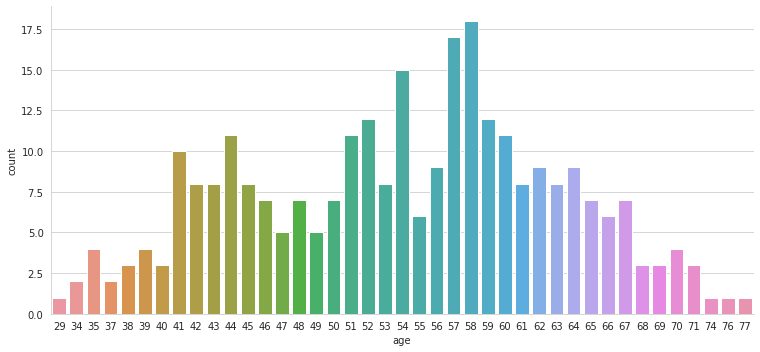

In [ ]:
sns.set_style("whitegrid")


#A count plot displays the number of observations in each category of your variable.
sns.catplot(x='age', data = df, kind='count',aspect=32/15);

a) **target variable distribution**

1    159
0    125
Name: target, dtype: int64


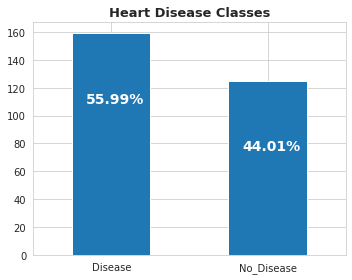

In [ ]:
print(df.target.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

58    18
57    17
54    15
52    12
59    12
44    11
51    11
60    11
41    10
62     9
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

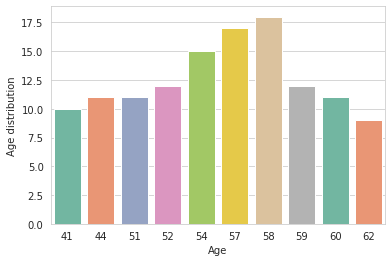

In [ ]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

Gender distribution according to target variable

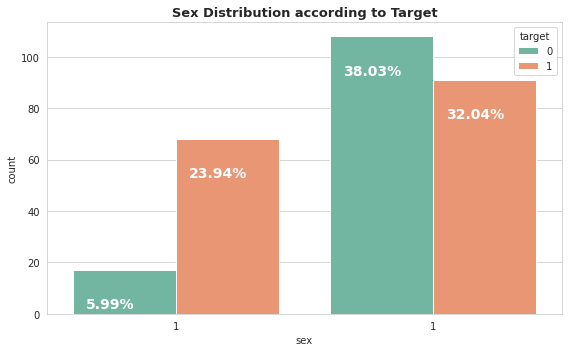

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['sex']
ax = sns.countplot(x='sex', hue='target', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

From the bar graph, we can observe that among disease patients, male are higher than female.

**d) Chest pain distribution according to target variable**

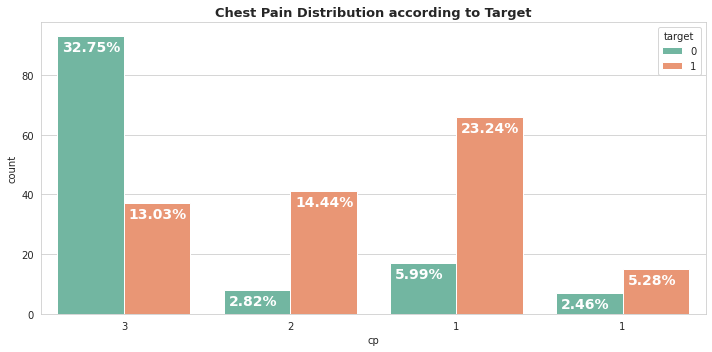

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['cp']
ax = sns.countplot(x='cp', hue='target', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**g) Correlation**

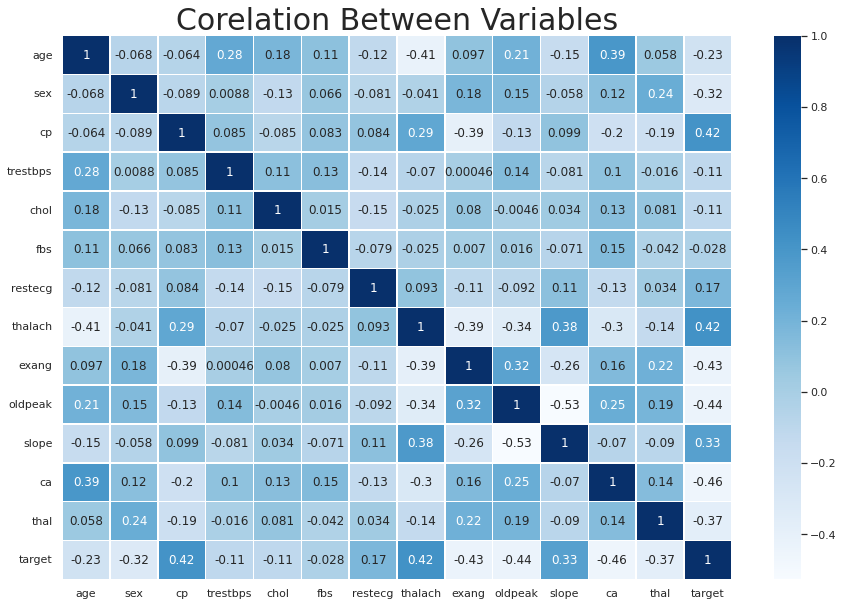

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target

‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target

‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target



